In [1]:
import pymongo
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
import yaml
from datetime import datetime
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import os
import spacy

# Initalization

In [2]:
# init
root_path = os.path.dirname(os.getcwd())

# load settings
with open(root_path + "/settings.yaml") as f:
    settings = yaml.safe_load(f)


In [3]:
# get the keyword by total sum of TFIDF value
def get_keyword_TFIDF(sparsed_matrix, vectorizer, return_num=0):
    sparsed_matrix = sparsed_tfidf
    sum_scores = [sum(i) for i in sparsed_matrix.transpose().toarray()]
    words=vectorizer.get_feature_names_out()
    result = list(zip(words, sum_scores))
    # sort the score in descending order
    result.sort(key=lambda x: x[1],reverse=True)

    if return_num==0:
        return_num=len(sum_scores)
    else:
        return_num = min(return_num, len(sum_scores)) # prevent return more than # of records
    return list(result[:return_num])

# Get Job Description Data

- Get the job description data, between 1 Jan 2022 and 28 Feb 2022, from Mongo DB.

In [4]:
# mongodb connection
client = pymongo.MongoClient(host=settings["mongo"]["host"], 
                             port=settings["mongo"]["port"],
                             username=settings["mongo"]["username"],
                             password=settings["mongo"]["password"]
                              )

# use db - dsjob
db = client.dsjob

# get all job_description within 1 JAN - 28 FEb 2022
query = {"post_date": {
                            "$gte": datetime(2022, 1, 1, 0, 0),
                            "$lt":  datetime(2022, 3, 1, 0, 0)
                            }
                    }

r = db.jobad.find(query, {"job_description"})
r = list(r)
df = pd.DataFrame(r)

In [5]:
print("Total Number of Job Description: " + str(df.shape[0]))

Total Number of Job Description: 1031


# Get Keyword By Using TF-IDF

- using Spacy to get the stop words
- tokenize the job description, lemmatisation, remove the stop words
- prepare the TF-IDF vectorizer

In [6]:
# convert job_description into lowercase
job_description = df.job_description
job_description = [desc.lower() for desc in job_description]

nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words # NOTE: all values in lowercase

# using spacy to tokenization, ignore stop words
for i in range(len(job_description)):
    doc = nlp(job_description[i]) 
    #job_description[i] = " ".join([token.text for token in doc if token.text not in stop_words ])
    job_description[i] = " ".join([token.text for token in doc if token.lemma_ not in stop_words ])

# prepare the vectorizer
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 3), use_idf=True)

# get the tfidf result
sparsed_tfidf = vectorizer.fit_transform(job_description)


# Generate Word Cloud

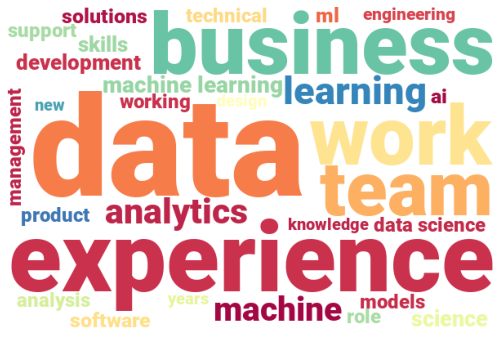

In [7]:
# get top keywords
top_keywords = get_keyword_TFIDF(sparsed_tfidf, vectorizer, 30)

# transform to proper format
d_text = {}
for (word, weight) in top_keywords:
    d_text[word] = weight

# check if font exist
font_path = root_path + "/font/Roboto/Roboto-Black.ttf"
font_path = font_path if os.path.isfile(font_path) else None

# prepare wordcloud
wc = WordCloud(background_color="white", 
               width =600, 
               height=400, 
               margin=2, 
               colormap="Spectral",
               font_path=font_path)
wc.fit_words(d_text)
wc.to_file("wc.png")

plt.figure(figsize=(10,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [8]:
top_keywords

[('data', 185.71721109491412),
 ('experience', 96.13105559509569),
 ('business', 72.03228669432045),
 ('work', 67.75895322740762),
 ('team', 62.50986761101197),
 ('learning', 60.841262526515365),
 ('analytics', 56.070732484534865),
 ('machine', 49.613256678126284),
 ('machine learning', 49.02777021696883),
 ('science', 43.877316871612685),
 ('skills', 39.9511578185608),
 ('development', 39.6356157414402),
 ('solutions', 37.04827482993781),
 ('ai', 36.76308838232701),
 ('ml', 36.735716585209765),
 ('software', 36.5652213313139),
 ('product', 34.67213601868155),
 ('models', 34.53146937389179),
 ('data science', 34.36134267378293),
 ('working', 34.031952284201445),
 ('technical', 33.45906109055025),
 ('management', 33.3196634183728),
 ('role', 32.603173646271266),
 ('analysis', 32.18462895323092),
 ('support', 31.39309744339475),
 ('engineering', 31.38621859546558),
 ('knowledge', 31.269891654467468),
 ('design', 31.246039641999577),
 ('new', 30.305468026347427),
 ('years', 30.02062548750